# **Split or Steal**

This notebook is a simulation of the game on the popular gameshow Golden Balls, where two participants must choose between either SPLIT or STEAL with a jackpot of £20,000 on the line. If both participants choose SPLIT, the jackpot is split between them evenly, however if one of them chooses STEAL, he/she can take the entire jackpot for him/herself. If *both* choose STEAL, neither participant gets anything. In our version, we start with a game of Split or Steal with a jackpot of 4 points, 2 points for each player if they both SPLIT, 4 if one STEALs, and none if both STEAL.

First let's import the necessary libraries

In [94]:
import random
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib as mpl
import matplotlib.pyplot as plt

In [95]:
mpl.style.use('ggplot')

In [96]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

And define the functions for running the game

In [97]:
def split_or_steal(lst, pot, dis):
    p1 = lst[0]
    p2 = lst[1]
    p1_take = 0
    p2_take = 0
    loss = -(abs(dis))
    if p1 == p2:
        if p1 == 1:
            p1_take = pot/2
            p2_take = pot/2
        elif p1 == 0:
            p1_take = 0
            p2_take = 0
    else:
        if p1 == 1:
            p2_take = pot
            p1_take = loss
        elif p1 == 0:
            p1_take = pot
            p2_take = loss
    return (lst, p1_take, p2_take)

In [98]:
def game(num, player1, player2, prize, dis, chance):
    jackpot = prize
    count = 0
    p1 = 0
    p2 = 0
    loss = -(abs(dis))
    last_move = []

    def true_altruist():
        move = 1
        return move

    def selfish():
        move = 0
        return move
    
    def player():
        strat = ''
        move = 0
        while True:
            strat = input('type SPLIT or STEAL: ')
            if strat.lower() not in ('split','steal'):
                print('please type in SPLIT or STEAL')
                continue
            else:
                break
        if strat.lower() == 'split':
            move += 1
        elif strat.lower() == 'steal':
            move += 0
        return move         

    def copycat(player, count, history):
        move = 1
        x = 0
        if player == 0:
            x += 1 
        if count == 0:
            move = 1
        else:
            move = history[-1][x]
        return move 
    
    def spiteful(player, count, history):  
        move = 1
        x = 0
        if player == 0:
            x += 1
        defects = []
        if count > 0:
            for k in history:
                if k[x] == 0:
                    defects.append(0)
            if len(defects) > 0:
                move = 0
            else:
                move = 1
        return move 
    
    def suspicious(player, count, history):
        move = 0
        x = 0
        if player == 0:
            x += 1
        if count > 0:
            move = history[-1][x]
        return move
    
    def gracious_copycat(player, count, history):
        move = 1
        x = 0
        if player == 0:
            x += 1
        lst = []
        if count > 2:
            lst = history[-2:]
            if lst[0][x] == 0 and lst[0][x] == lst[1][x]:
                move = 0
            elif lst[0][x] == 1:
                move = 1
        else:
            move = 1
        return move
    
    def pavlov(player, count, history):
        move = 1
        x = 0
        if player == 0:
            x += 1
        if count > 0:
            if history[-1][x] == history[-1][player]:
                move += 0
            elif history[-1][x] != history[-1][player]:
                k = abs(move - 1)
                move = k
        return move
    
    def rando():
        chance = random.random()
        move = 0
        if chance < 0.5:
            move += 1
        else:
            move += 0
        return move
    
    def ddc(player, count, history):
        move = 0
        if count == 0 or count == 1:
            move = 0
        else:
            if history[-1][player] == 1:
                move = 0
            elif history[-1][player] == history[-2][player]:
                move = 1
            elif history[-1][player] == 0 and history[-1][player] != history[-2][player]:
                move = 0
        return move
    
    def ccd(player, count, history):
        move = 1
        if count == 0 or count == 1:
            move = 1
        else:
            if history[-1][player] == 0:
                move = 1
            elif history[-1][player] == history[-2][player]:
                move = 0
            elif history[-1][player] == 1 and history[-1][player] != history[-2][player]:
                move = 1
        return move
    
    def gradual(player, count, history):
        move = 1
        x = 0
        if player == 0:
            x += 1
        defects = []
        for k in history:
            if k[x] == 0:
                defects.append(0)
        moves = defects
        for i in range(2):
            moves.append(1)
        if count == 0:
            moves = [move]
        return moves
    
    def detective(player, count, history):
        move = 1
        x = 0
        if player == 0:
            x += 1
        defects = []
        for k in history:
            if k[x] == 0 and count < 4:
                defects.append(0)
        if count == 0 or count == 2 or count == 3:
            move = 1
        elif count == 1:
            move = 0
        elif count > 3:
            if len(defects) > 0:
                move = history[-1][x]
            elif len(defects) == 0:
                move = 0
        return move
                
                
            
    gradual1 = []
    gradual2 = []
    
    while count < num:
        a1 = 0
        a2 = 0
        if player1 == 't':
            a1 = true_altruist()
        elif player1 == 's':
            a1= selfish()
        elif player1 == 'c':
            a1 = copycat(0,count,last_move)
        elif player1 == 'd':
            a1 = detective(0,count,last_move)
        elif player1 == 'sp':
            a1 = spiteful(0,count,last_move)
        elif player1 == 'su':
            a1 = suspicious(0,count,last_move)
        elif player1 == 'gc':
            a1 = gracious_copycat(0,count,last_move)
        elif player1 == 'p':
            a1 = pavlov(0,count,last_move)
        elif player1 == 'r':
            a1 = rando()
        elif player1 == 'ddc':
            a1 = ddc(0,count,last_move)
        elif player1 == 'ccd':
            a1 = ccd(0,count,last_move)
        elif player1 == 'p':
            a1 = player()

        if player2 == 't':
            a2 = true_altruist()
        elif player2 == 's':
            a2 = selfish()
        elif player2 == 'c':
            a2 = copycat(1,count,last_move)
        elif player2 == 'd':
            a2 = detective(1,count,last_move)
        elif player2 == 'sp':
            a2 = spiteful(1,count,last_move)
        elif player2 == 'su':
            a2 = suspicious(1,count,last_move)
        elif player2 == 'gc':
            a2 = gracious_copycat(1,count,last_move)
        elif player2 == 'p':
            a2 = pavlov(1,count,last_move)
        elif player2 == 'r':
            a2 = rando()
        elif player2 == 'ddc':
            a2 = ddc(1,count,last_move)
        elif player2 == 'ccd':
            a2 = ccd(1,count,last_move)
        elif player2 == 'p':
            a2 == player()
        

        #The players do the opposite move with a probability of chance
        i = random.random()
        j = random.random()
        if i < chance:
            a1 = abs(a1 - 1)
        if j < chance:
            a2 = abs(a2 - 1)
        
        moves = [a1, a2]
        x = split_or_steal(moves, jackpot, loss)
        last_move.append(x[0])
        p1 += x[1]
        p2 += x[2]
        count += 1
    return [count, p1, p2]

In [99]:
def matchmaker(frame, num, prize, dis, chance):
    df = frame
    comb = combinations(frame.index, 2)
    matches = []
    loss = -(abs(dis))
    for i in comb:
        matches.append(i)
    
    for x in matches:
        p1 = x[0]
        p2 = x[1]
        p1_strat = df.loc[p1,'code']
        p2_strat = df.loc[p2,'code']
        result = game(num, p1_strat, p2_strat, prize, loss, chance)
        frame.at[p1,'pot'] += result[1]
        frame.at[p2,'pot'] += result[2]
    
    return frame

In [100]:
def reset(df):
    df.sort_values('pot', ascending=False, inplace=True)
    del_pool = []
    to_drop = []
    for x in df.index:
        # if it is less than the 5th worst performing's pot it will be deleted
        if df.loc[x,'pot'] < df.iloc[-5,2]: 
            to_drop.append(x)
        # if not and if it is as bad as the 5th worst performing, it is added to the pool of deletions to be randomly selected
        elif df.loc[x,'pot'] == df.iloc[-5,2]:
            del_pool.append(x)
            
    while len(to_drop) < 5:
        to_del = del_pool[random.randint(0,len(del_pool)-1)]
        if to_del not in to_drop:
            to_drop.append(to_del)

    
    
    df.drop(to_drop, inplace=True)
    df.sort_values('pot', inplace=True)
    
    
    rep_pool = []
    to_repl = []
    for x in df.index:
        if df.loc[x,'pot'] > df.iloc[-5,2]:
            to_repl.append(x)
        elif df.loc[x,'pot'] == df.iloc[-5,2]:
            rep_pool.append(x)
            
    while len(to_repl) < 5:
        to_rep = rep_pool[random.randint(0,len(rep_pool)-1)]
        if to_rep not in to_repl:
            to_repl.append(to_rep)

        
    df_top5 = df.loc[to_repl]
    df = pd.concat([df,df_top5])
    
    df.reset_index(inplace=True)
    df.drop(columns=['player'], inplace=True)
    df.index.names=['player']
    df['pot'] = 0
    
    return df
        

In [101]:
def create(lst):
    dictionary = {'player':[], 'strategy':[], 'code': [], 'pot':[]}
    for x in range(lst[0]+lst[1]+lst[2]+lst[3]+lst[4]+lst[5]+lst[6]+lst[7]+lst[8]+lst[9]+lst[10]):
        dictionary['player'].append(x)
        dictionary['pot'].append(0)
        
    for x in range(lst[0]):
        dictionary['strategy'].append('True Altruist')
        dictionary['code'].append('t')
    for x in range(lst[1]):
        dictionary['strategy'].append('Selfish B')
        dictionary['code'].append('s')
    for x in range(lst[2]):
        dictionary['strategy'].append('Copycat')
        dictionary['code'].append('c')
    for x in range(lst[3]):
        dictionary['strategy'].append('Detective')
        dictionary['code'].append('d')
    for x in range(lst[4]):
        dictionary['strategy'].append('Spiteful')
        dictionary['code'].append('sp')
    for x in range(lst[5]):
        dictionary['strategy'].append('Suspicious')
        dictionary['code'].append('su')
    for x in range(lst[6]):
        dictionary['strategy'].append('Gracious Copycat')
        dictionary['code'].append('gc')
    for x in range(lst[7]):
        dictionary['strategy'].append('Pavlov')
        dictionary['code'].append('p')
    for x in range(lst[8]):
        dictionary['strategy'].append('Rando')
        dictionary['code'].append('r')
    for x in range(lst[9]):
        dictionary['strategy'].append('DDC')
        dictionary['code'].append('ddc')
    for x in range(lst[10]):
        dictionary['strategy'].append('CCD')
        dictionary['code'].append('ccd')
    
    df = pd.DataFrame(dictionary)
    df.set_index('player', inplace=True)
    
    
    return df

In [102]:
def run_iteration(iterations, blank_frame, rounds, prize, punishment, chance, auto):
    df = blank_frame
    rankings = blank_frame
    for x in range(iterations):
        command = ''
        if auto == 0:
            command = input('Press ENTER to continue or type "stop" to end: ')
        if command == 'stop':
            break
        df1 = matchmaker(df, rounds, prize, punishment, chance)
        df1_count = df1.groupby('strategy').count()
        df1_count.drop(columns='pot', inplace=True)
        df1_count.rename(columns={'code':x}, inplace=True)
        df1_count = df1_count.T
        if x == 0:
            rankings = df1_count
        else:
            rankings = rankings.append(df1_count)
        rankings.index = rankings.index.map(int)
        
        df = reset(df1)
    return rankings

Let's also define some simulated players to play. The player's strategies are:
* `true_altruist`: Always plays COOPERATE
* `selfish`: Always plays DEFECT



Let's play an example game of 10 rounds between the naive `true_altruist` and the selfish `selfish`. Who will win?

In [103]:
outcome = game(10,'t','s',4,0,0)
print('The true_altruist scored: ', outcome[1])
print('The selfish scored: ', outcome[2])

The true_altruist scored:  0
The selfish scored:  40


Unsuprisingly, the `true_altruist` suffered a humiliating defeat, what if we show the `selfish` a taste of their own medicine?

In [104]:
outcome = game(10,'s','s',4,0,0)
print('The selfish scored: ', outcome[1])
print('The selfish scored: ', outcome[2])

The selfish scored:  0
The selfish scored:  0


Now both players end up with 0, what if we pitted a kinder opponent against our `true_altruist` such as another `true_altruist`

In [105]:
outcome = game(10,'t','t',4,0,0)
print('The true_altruist scored: ', outcome[1])
print('The selfish scored: ', outcome[2])

The true_altruist scored:  20.0
The selfish scored:  20.0


Finally we get a mutually beneficial outcome

What if instead we had multiple players for each strategy? Let's run a tournament with 20 `true_altruist` and just 1 `selfish`. Every player plays against every other player once for 10 rounds of Split or Steal. The top 5 scoring players are replicated (if there is a tie, the 5 are chosen randomly) and the worst 5 players are killed (if there is a tie, the 5 are chosen randomly). Who will win?

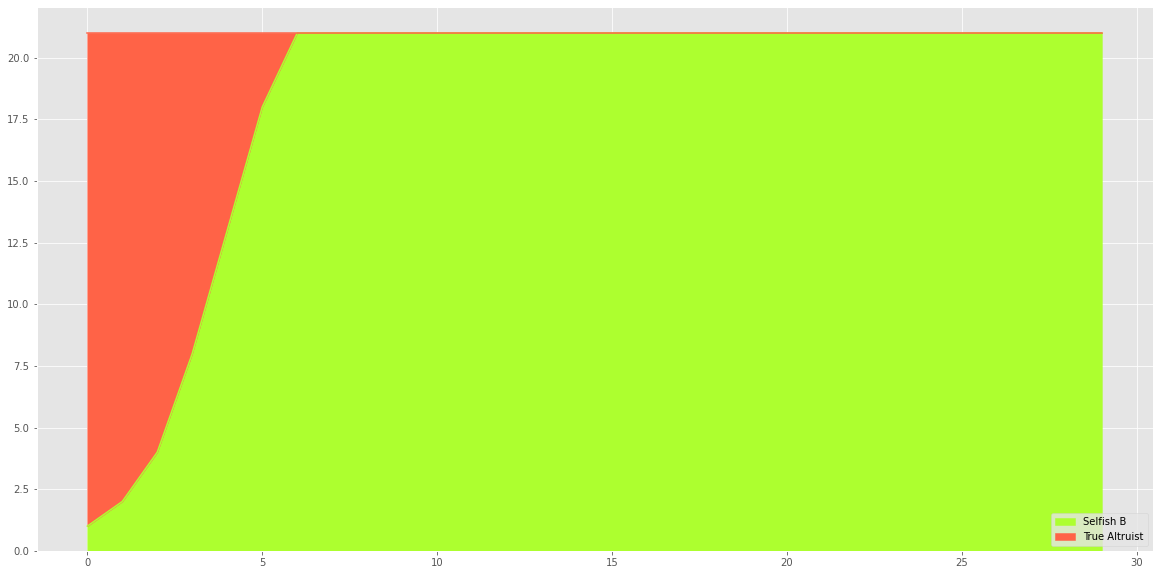

In [106]:
start_population= [20,1,0,0,0,0,0,0,0,0,0]
dfa = create(start_population)
plot = run_iteration(30, dfa, 10, 4, 0, 0, 1)
plot.plot(kind='area',
          stacked=True,
          figsize=(20,10),
          color = ['greenyellow','tomato','midnightblue','steelblue','gold','lightseagreen','dodgerblue','springgreen','pink','palevioletred','darkmagenta']
         )

Even a single `selfish` quickly eliminated all of the `true_altruist`. Let's introduce a new participant now, the `copycat`. We'll have 20 `true_altruist`, 5 `selfish` and 5 `copycat`. Who will win now?

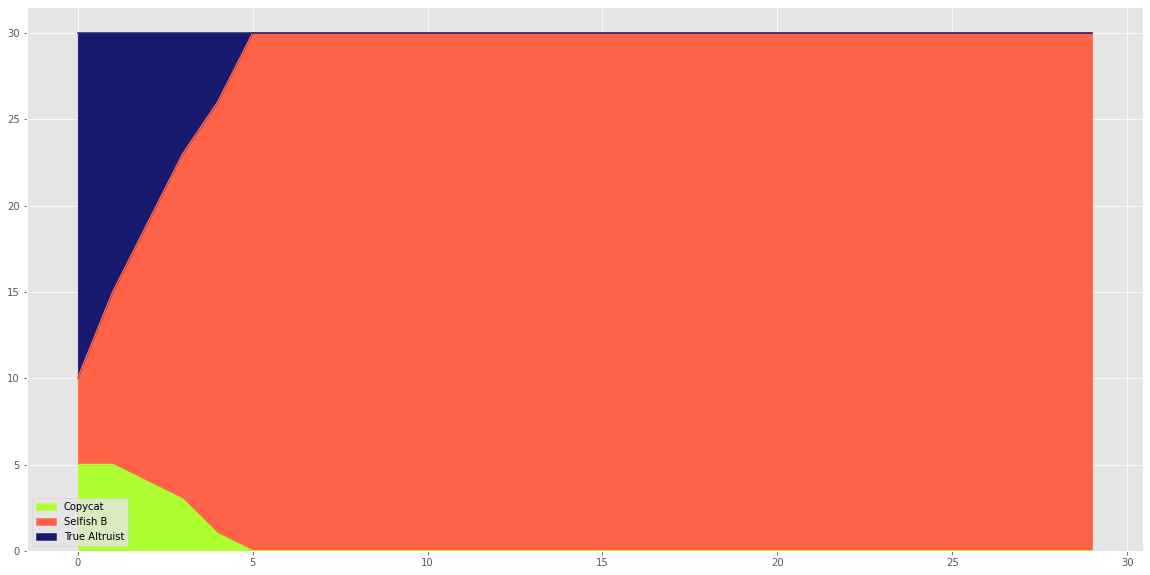

In [145]:
start_population= [20,5,5,0,0,0,0,0,0,0,0]
dfa = create(start_population)
plot = run_iteration(30, dfa, 10, 4, 0, 0, 1)
plot.plot(kind='area',
          stacked=True,
          figsize=(20,10),
          color = ['greenyellow','tomato','midnightblue','steelblue','gold','lightseagreen','dodgerblue','springgreen','pink','palevioletred','darkmagenta']
         )

The `selfish` still wins, this is because there is no punishment for defection, it is a winner-takes-all game. Now instead what if we modify the payoffs, so that being stolen from gives the player who lost a disutility of 1 point.

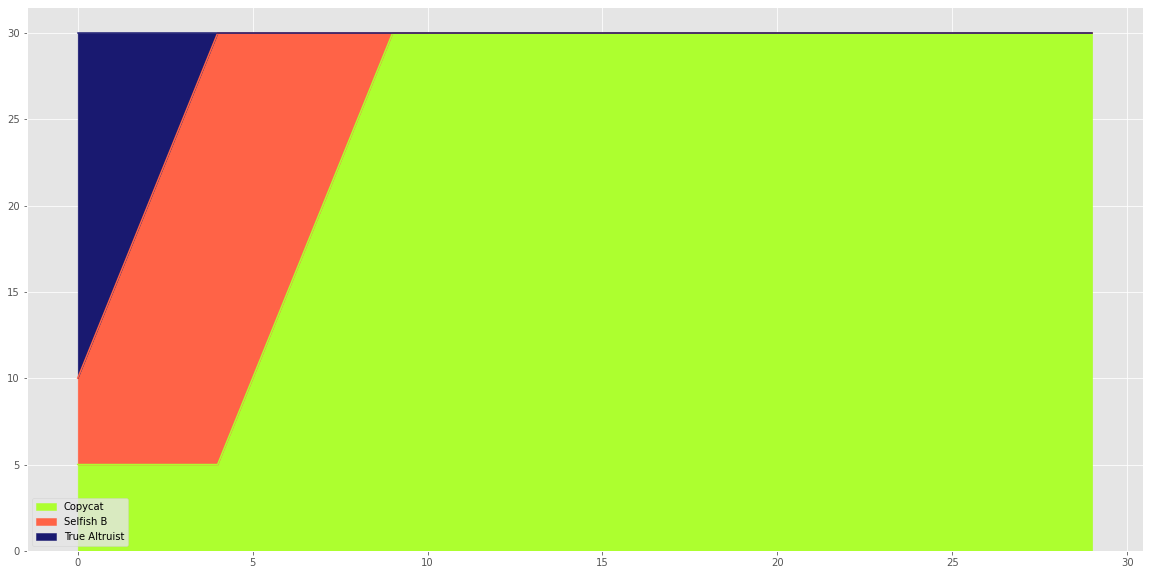

In [147]:
start_population= [20,5,5,0,0,0,0,0,0,0,0]
dfa = create(start_population)
plot = run_iteration(30, dfa, 10, 4, 1, 0, 1)
plot.plot(kind='area',
          stacked=True,
          figsize=(20,10),
          color = ['greenyellow','tomato','midnightblue','steelblue','gold','lightseagreen','dodgerblue','springgreen','pink','palevioletred','darkmagenta']
         )

In the first 5 generations as expected, the `selfish` quickly wipes out the `true_altruist`s. But afterwards, any `selfish` who plays with a `copycat` is punished with defection as well. While `copycat`s who play against other `copycat`s reward each other's cooperation and therefore score the highest, so eventually the `selfish` are eliminated because of their own greed

Let's define some more players:
* `copycat`: Same as Tit-for-Tat, starts with COOPERATE then repeats rival’s last move
* `suspicious`: Similar to Copycat, except starts with DEFECT and then repeats rival’s last move
* `detective`: Plays COOPERATE, DEFECT, COOPERATE, COOPERATE, if rival also DEFECTS at least once in the last 4 moves, acts like Copycat, else it acts like Selfish

This tournament will run for 50 generations.

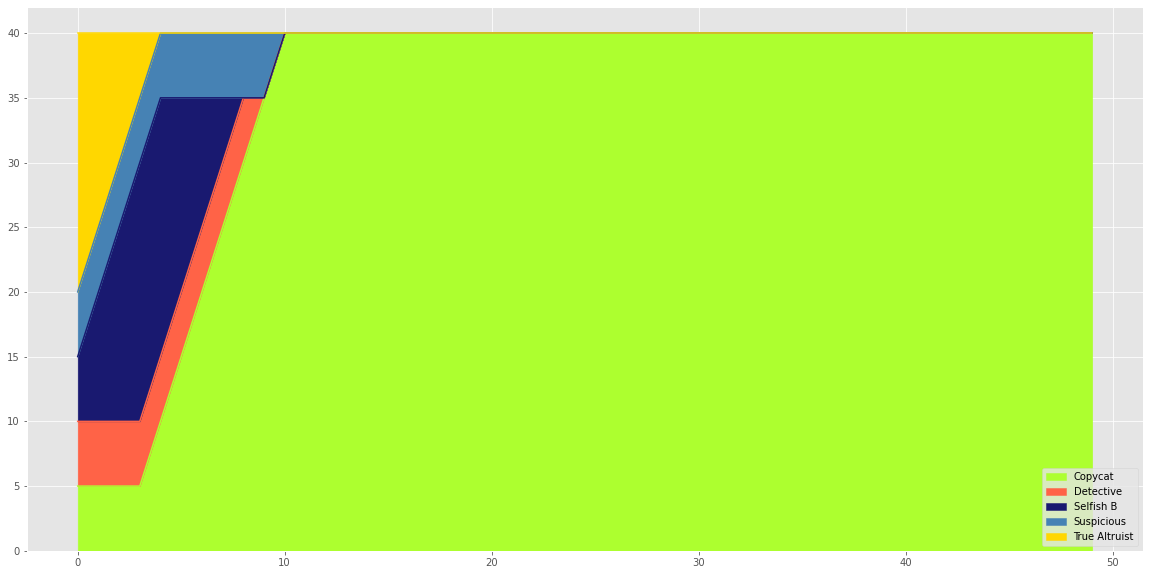

In [126]:
start_population= [20,5,5,5,0,5,0,0,0,0,0]
dfa = create(start_population)
plot = run_iteration(50, dfa, 50, 4, 1, 0, 1)
plot.plot(kind='area',
          stacked=True,
          figsize=(20,10),
          color = ['greenyellow','tomato','midnightblue','steelblue','gold','lightseagreen','dodgerblue','springgreen','pink','palevioletred','darkmagenta']
         )


Now let's imagine a scenario where two `copycat`s are playing against each other, the first three rounds go on without a hitch as they both cooperate but on the fourth round, the signal to COOPERATE from one `copycat` is corrupted and the system instead interprets it as DEFECT. The corrupted `copycat` steals the entire pot. In retaliation, the other `copycat` DEFECTs on the next round. In retaliation to that, the first `copycat` who was corrupted also DEFECTS, and so the game goes on in a never-ending cycle of revenge and DEFECTion. This is the same as miscommunication problems in the real world, let's modify the tournament so there is now a 5% chance that the signal gets scrambled and players play the opposite move.

So let's add some more strategies:
* `gracious_copycat`: like the `copycat` it plays COOPERATE but only DEFECTS if its opponent DEFECTS twice, also known as tit-for-2tat
* `pavlov`: Also known as win-stay-lose-shift, start with COOPERATE, after, if rival’s move is the same as Pavlov, Pavlov continues playing the same move, if rival’s move is different from Pavlov, it switches moves
* `rando`: plays COOPERATE or DEFECT randomly with equal probability
* `ddc`: Plays DEFECT, DEFECT, COOPERATE periodically
* `ccd`: Plays COOPERATE, COOPERATE, DEFECT periodically


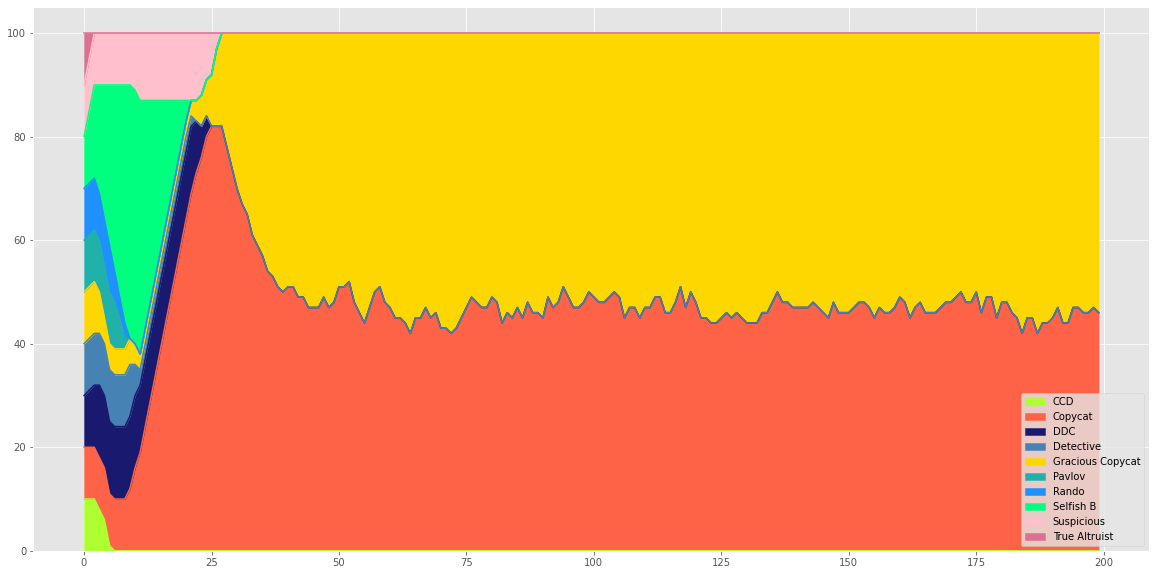

In [143]:
start_population= [10,10,10,10,0,10,10,10,10,10,10]
dfa = create(start_population)
plot = run_iteration(200, dfa, 10, 4, 1, 0.05, 1)
plot.plot(kind='area',
          stacked=True,
          figsize=(20,10),
          color = ['greenyellow','tomato','midnightblue','steelblue','gold','lightseagreen','dodgerblue','springgreen','pink','palevioletred','darkmagenta']
         )

With the possibility of miscommunication, `copycat` and `gracious_copycat` become the best performing strategies, generally balancing out at 50/50 of the population.

_**Change numbers in the cell below only**_

In [85]:
generations = 500   # number of generations the tournament will run for
rpg = 10   # number of rounds each player plays per game
prize = 4   # the total jackpot that can be won
loss = 1   # the loss from being stolen from (it is converted into a negative value)
chance = 0   # probability of miscommunication
ta = 10   # number of true_altruist playing 
sh = 10   # number of selfish playing
cc = 10   # number of copycat playing
det = 10   # number of detective playing
sus = 10   # number of suspicious playing
gcc = 10   # number of gracious_copycat playing
pav = 10   # number of pavlov playing
rand = 10   # number of rando playing
ddc = 10   # number of ddc playing
ccd = 10   # number of ccd playing



Run this cell to start the simulation.

In [ ]:
start_population= [ta,sh,cc,det,0,sus,gcc,pav,rand,ddc,ccd]
dfa = create(start_population)
plot = run_iteration(generations, dfa, rpg, prize, loss, chance, 1)
plot.plot(kind='area',
          stacked=True,
          figsize=(20,10),
          color = ['greenyellow','tomato','midnightblue','steelblue','gold','lightseagreen','dodgerblue','springgreen','pink','palevioletred','darkmagenta']
         )